In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Data/yob1880.txt', header=None, names=['name', 'gender', 'count'])

In [3]:
df1.head(2)

,name,gender,count
0,Mary,F,7065
1,Anna,F,2604


In [4]:
df2 = pd.read_csv('Data/yob1881.txt', header=None, names=['name', 'gender', 'count'])

In [5]:
df2.head(2)

,name,gender,count
0,Mary,F,6919
1,Anna,F,2698


Now we will concatenate these two data with the year as an index

In [6]:
pd.concat([df1,df2], keys=[1880,1881]).droplevel(level=1).reset_index()

,index,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
3930,1881,Wiliam,M,5
3931,1881,Wilton,M,5
3932,1881,Wing,M,5
3933,1881,Wood,M,5


So now we will do for all the years 

In [7]:
years = list(range(1880,2019))

We will first read the every single year in text data and append it all in a list

In [8]:
years_df = [pd.read_csv(f'Data/yob{i}.txt', header=None, names=['name', 'gender', 'count']) for i in years]

In [9]:
len(years)

139

In [10]:
len(years_df)

139

Now we will concatenate all the dfs in the years_df

In [11]:
df = pd.concat(years_df, keys=years, names=['year']).droplevel(1).reset_index()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   year    int64 
 1   name    object
 2   gender  object
 3   count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [13]:
df['gender'] = df['gender'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   year    int64   
 1   name    object  
 2   gender  category
 3   count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 46.7+ MB


Setting the gender column to category datatype can reduce the memory usage

### Warming up EDA

- Most popular baby girl names in the chosen years
- Most popular baby boy names in the chosen years
- Evergreen boys name between 1880 to 2018
- Evergreen girls name between 1880 to 2018
- Yearly count of baby born
- Yearly count of different baby's name

In [15]:
def popular(years, gender):
    x = [df.loc[(df['year']==i) & (df['gender']==gender)].nlargest(1, columns='count') for i in years]
    return pd.concat(x)

In [16]:
popular([1900,2000,2018], 'F')

,year,name,gender,count
52265,1900,Mary,F,16706
1332810,2000,Emily,F,25956
1925013,2018,Emma,F,18688


In [17]:
popular([1920,1950,1989,2015], 'M')

,year,name,gender,count
175219,1920,John,M,56913
468058,1950,James,M,86224
1060440,1989,Michael,M,65389
1845383,2015,Noah,M,19635


In [18]:
popular(list(range(1880,2019)), 'M')

,year,name,gender,count
942,1880,John,M,9655
2938,1881,John,M,8769
4963,1882,John,M,9557
7116,1883,John,M,8894
9318,1884,John,M,9388
...,...,...,...,...
1812240,2014,Noah,M,19305
1845383,2015,Noah,M,19635
1878249,2016,Noah,M,19117
1910798,2017,Liam,M,18798


In [19]:
popular(list(range(1880,2019)), 'F')

,year,name,gender,count
0,1880,Mary,F,7065
2000,1881,Mary,F,6919
3935,1882,Mary,F,8148
6062,1883,Mary,F,8012
8146,1884,Mary,F,9217
...,...,...,...,...
1793049,2014,Emma,F,20936
1826292,2015,Emma,F,20455
1859413,2016,Emma,F,19496
1892423,2017,Emma,F,19800


In [20]:
plt.rcParams['figure.figsize'] = (16,8)

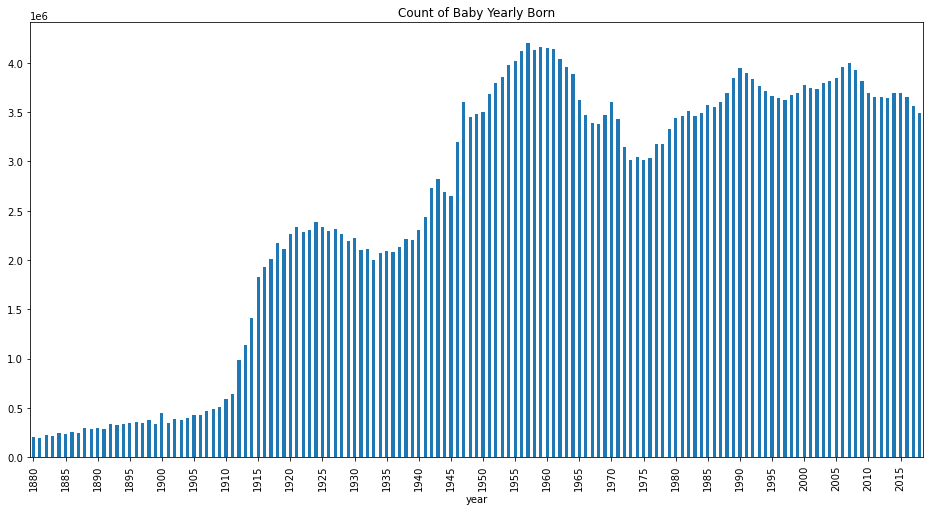

In [21]:
yearly_babies = df.groupby('year')['count'].sum()
yearly_babies.plot(kind='bar')
plt.xticks(ticks=(range(0,len(yearly_babies), 5)), labels=range(1880,2019,5))
plt.title('Count of Baby Yearly Born');

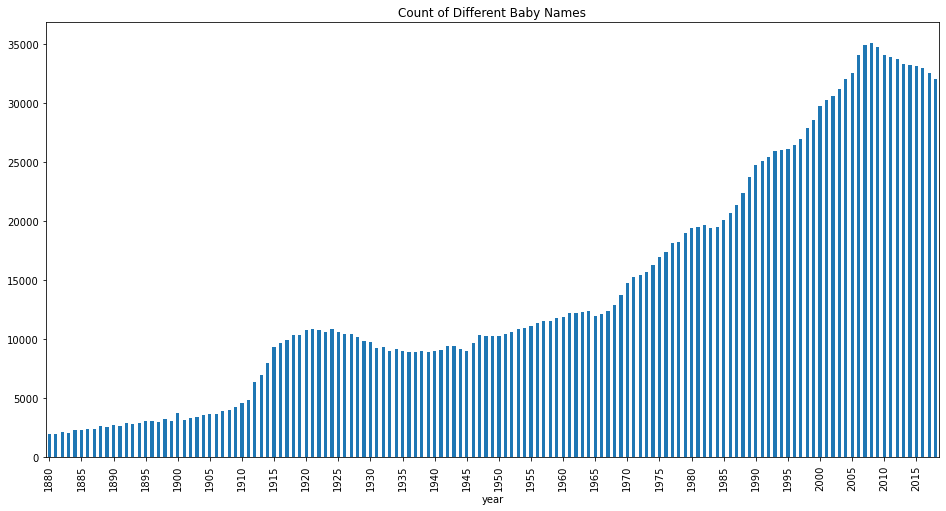

In [22]:
diff_name = df.groupby('year')['name'].count()
diff_name.plot(kind='bar')
plt.xticks(ticks=(range(0,len(diff_name), 5)), labels=range(1880,2019,5))
plt.title('Count of Different Baby Names');

In [23]:
aggregation = df.groupby(['name', 'gender']).agg(total=('count','sum'), no_year=('year', 'count'), first_year=('year', 'min'), last_year=('year', 'max'), max_count =('count','max'))

In [24]:
aggregation

total  no_year  first_year  last_year  max_count
name    gender                                                  
Aaban   F           0        0         NaN        NaN        NaN
        M         114       11      2007.0     2018.0       16.0
Aabha   F          35        5      2011.0     2016.0        9.0
        M           0        0         NaN        NaN        NaN
Aabid   F           0        0         NaN        NaN        NaN
...               ...      ...         ...        ...        ...
Zyyanna M           0        0         NaN        NaN        NaN
Zyyon   F           0        0         NaN        NaN        NaN
        M           6        1      2014.0     2014.0        6.0
Zzyzx   F           0        0         NaN        NaN        NaN
        M          10        2      2010.0     2018.0        5.0

[196800 rows x 5 columns]

What is the 5 most popular name all time for male and female?

In [25]:
all_t = aggregation.groupby('gender').apply(lambda x:x.nlargest(8,'total')).droplevel(-1).reset_index()

In [26]:
all_t

,gender,name,total,no_year,first_year,last_year,max_count
0,F,Mary,4125675,139,1880.0,2018.0,73985.0
1,F,Elizabeth,1638349,139,1880.0,2018.0,20744.0
2,F,Patricia,1572016,135,1884.0,2018.0,56442.0
3,F,Jennifer,1467207,101,1916.0,2018.0,63603.0
4,F,Linda,1452668,139,1880.0,2018.0,99689.0
5,F,Barbara,1434397,139,1880.0,2018.0,48792.0
6,F,Margaret,1248985,139,1880.0,2018.0,28467.0
7,F,Susan,1121703,139,1880.0,2018.0,47402.0
8,M,James,5164280,139,1880.0,2018.0,94757.0
9,M,John,5124817,139,1880.0,2018.0,88319.0


In [27]:
import plotly.express as px
import plotly.graph_objects as go

In [28]:
px.bar(data_frame=all_t, x='name', y='max_count', color='gender')

### Creating two new features: 'Popularity' and 'Rank'

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [29]:
df.groupby(['year','gender'])['count'].sum()

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: count, Length: 278, dtype: int64

In [30]:
df.groupby(['year','gender'])['count'].transform('sum')

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: count, Length: 1957046, dtype: int64

In [31]:
df['popularity'] = df['count']/(df.groupby(['year','gender'])['count'].transform('sum'))*1000000

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [32]:
df['rank'] = df.groupby(['year', 'gender'])['count'].apply(lambda x:x.rank(ascending=False))

In [33]:
from plotly.subplots import make_subplots

In [34]:
def popular_name(name, gender):
    fig = make_subplots(specs=[[{'secondary_y':True}]])
    df1 = df.copy()
    df1 = df1[(df1['name']==name) & (df1['gender']==gender)]

    fig.add_trace(
        go.Bar(x=df1['year'], y=df1['popularity'], name='popularity'), secondary_y=False
    )

    fig.add_trace(
    go.Scatter(x=df1['year'], y=df1['rank'], mode='lines', name='rank'), secondary_y=True
    )

    fig.update_layout(title_text=f'Popularity vs Rank over time for {name}, gender: {gender}')
    fig.show('png')
    return fig

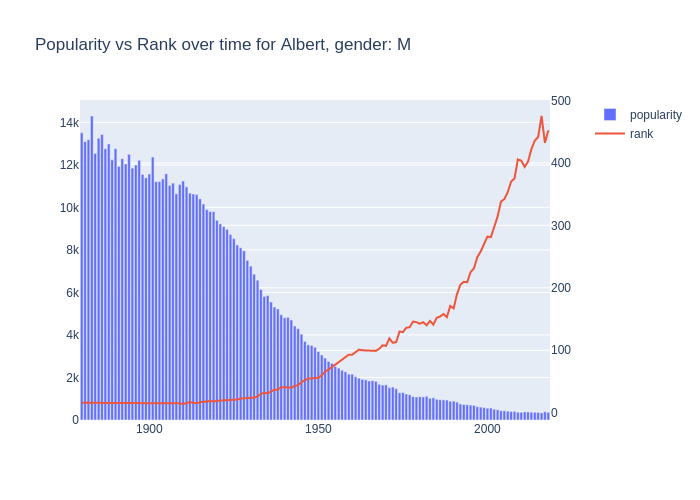

In [35]:
popular_name('Albert', 'M')

Name 'Albert' is decreasing over time. In 1880 until 1900 name Albert was popular

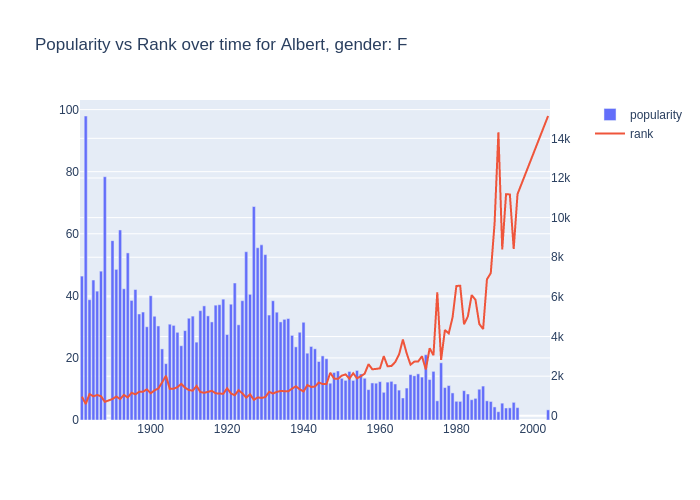

In [36]:
popular_name('Albert', 'F')

In [37]:
df.groupby(['name', 'gender'])['popularity'].shift()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1957041    3.798491
1957042    3.138835
1957043    2.713208
1957044    8.139624
1957045    2.608955
Name: popularity, Length: 1957046, dtype: float64

In [38]:
df[(df['name']=='Albert') & (df['gender']=='M')]['popularity']

957        13512.535071
2953       13092.721082
4978       13185.440600
7131       14298.685783
9333       12539.102777
               ...     
1812674      362.628120
1845823      362.012349
1878723      339.926570
1911229      387.988737
1943493      364.920528
Name: popularity, Length: 139, dtype: float64

In [39]:
df[(df['name']=='Albert') & (df['gender']=='M')]['popularity'].shift()

957                 NaN
2953       13512.535071
4978       13092.721082
7131       13185.440600
9333       14298.685783
               ...     
1812674      368.112652
1845823      362.628120
1878723      362.012349
1911229      339.926570
1943493      387.988737
Name: popularity, Length: 139, dtype: float64

### Analyze why does sudden name's popularity change

__Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [40]:
df['pop_lag1'] = df.groupby(['name', 'gender'])['popularity'].shift()

In [41]:
df['pop_diff'] = df['popularity'] - df['pop_lag1']

In [42]:
df.sample(5)

,year,name,gender,count,popularity,rank,pop_lag1,pop_diff
130627,1916,Floria,F,24,22.981000,1556.5,12.196795,10.784204
1497022,2005,Eriyah,F,10,5.415578,10520.5,NaN,NaN
708065,1970,Charle,M,19,10.219955,2090.5,10.620049,-0.400094
202500,1923,Leonora,F,120,99.471063,679.5,99.918150,-0.447088
485177,1952,Lilli,F,19,10.245896,2456.0,10.550503,-0.304607


In [43]:
df.nlargest(5,'pop_diff')

,year,name,gender,count,popularity,rank,pop_lag1,pop_diff
431066,1947,Linda,F,99689,56236.224976,1.0,33546.795584,22689.429392
321479,1935,Shirley,F,42358,40398.317993,2.0,21874.356531,18523.961462
922468,1983,Ashley,F,33293,19930.187772,4.0,8774.639361,11155.548411
711426,1971,Jennifer,F,56783,34133.547814,1.0,26403.416193,7730.131621
47952,1898,Dewey,M,1115,9088.019301,19.0,1401.243382,7686.775919


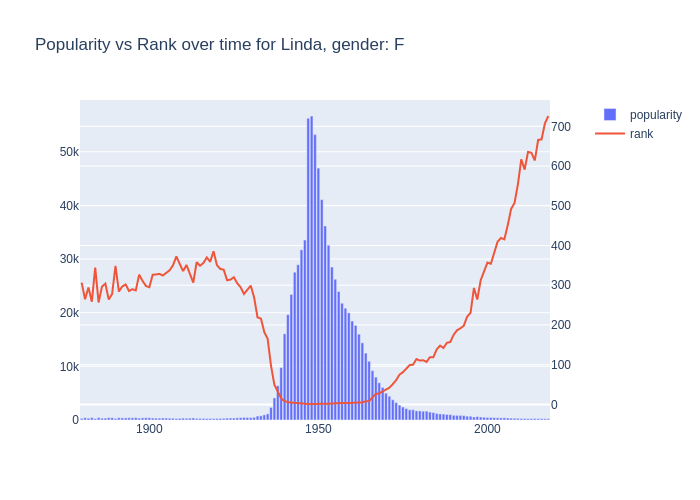

In [44]:
popular_name('Linda', 'F')

In [45]:
df.nsmallest(5,columns='pop_diff')

,year,name,gender,count,popularity,rank,pop_lag1,pop_diff
339412,1937,Shirley,F,26816,25204.262994,4.0,33797.507168,-8593.244174
330516,1936,Shirley,F,35161,33797.507168,2.0,40398.317993,-6600.810824
461947,1950,Linda,F,80431,46951.516726,1.0,53199.224714,-6247.707988
472250,1951,Linda,F,73978,41079.216509,1.0,46951.516726,-5872.300217
961380,1985,Jennifer,F,42651,24789.454412,3.0,30032.147389,-5242.692976


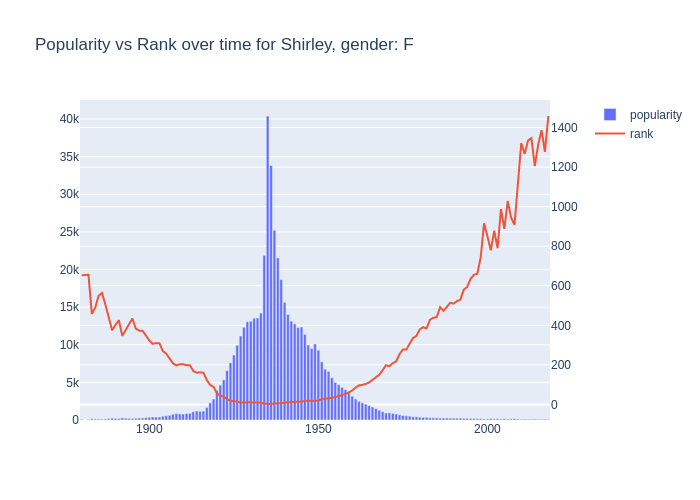

In [46]:
popular_name('Shirley', 'F')

### Names that appeared out of nowhere

In [47]:
df[df['pop_lag1']< 5].nlargest(5, columns='popularity')

,year,name,gender,count,popularity,rank,pop_lag1,pop_diff
758040,1974,Nakia,F,1134,772.792261,226.0,4.800564,767.991697
645832,1966,Tabatha,F,500,295.522771,419.0,2.832792,292.689979
1553888,2007,Jaslene,F,501,260.794471,599.5,2.631823,258.162648
1411471,2002,Omarion,M,418,215.405625,534.5,2.574620,212.831005
1519907,2006,Akeelah,F,403,212.124913,707.0,3.340807,208.784105


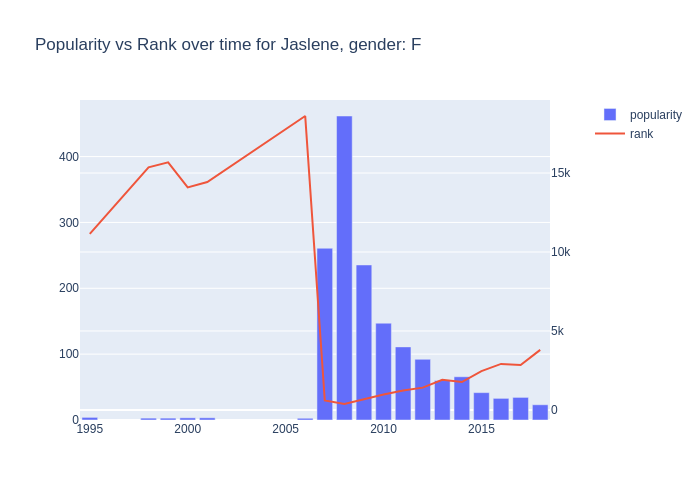

In [48]:
popular_name('Jaslene', 'F')

### Highest percentage decrease among popular names

In [49]:
df['perc_change'] = ((df['popularity']/df['pop_lag1'])-1)*100

In [50]:
df.loc[df['pop_lag1']>1000].nsmallest(5,columns='perc_change')

,year,name,gender,count,popularity,rank,pop_lag1,pop_diff,perc_change
758121,1974,Katina,F,765,521.328112,307.0,1696.656476,-1175.328363,-69.273208
1119924,1992,Iesha,F,581,315.149924,432.5,1011.353186,-696.203262,-68.838787
1423744,2003,Ashanti,F,962,526.784702,325.0,1639.779663,-1112.994960,-67.874665
515370,1955,Marian,F,1499,766.777412,208.0,2066.633879,-1299.856467,-62.897279
175401,1920,Woodrow,M,774,727.182534,182.5,1844.628794,-1117.446260,-60.578381


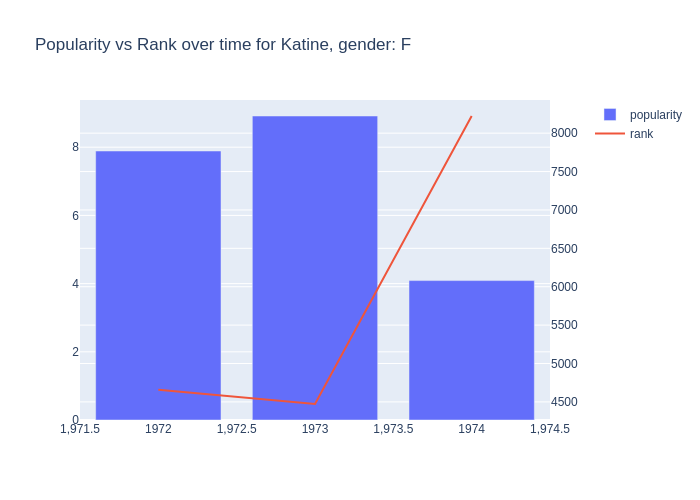

In [51]:
popular_name('Katine', 'F')

### Finding Unisex Names

- Sum the female and male count. The highest means the most unisex name

In [52]:
us = df.groupby(['name', 'gender'])['count'].sum().unstack().dropna()

In [53]:
us.min(axis=1).sort_values(ascending=False).head()

name
Willie    146156
Jordan    131004
Leslie    112726
Taylor    110390
Jessie    110212
dtype: int64

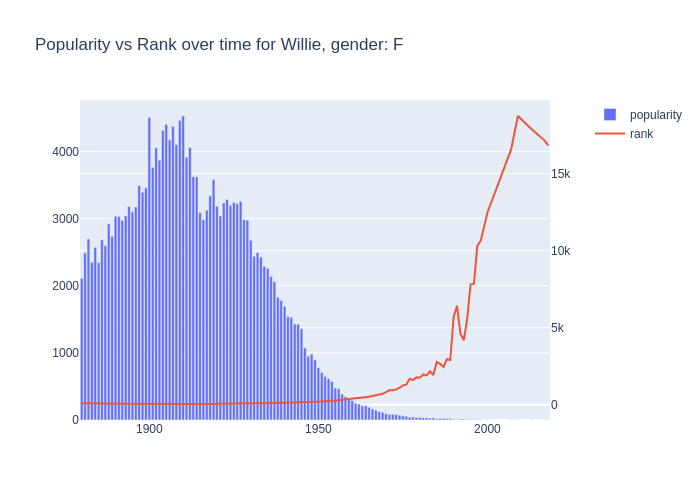

In [54]:
popular_name('Willie','F')

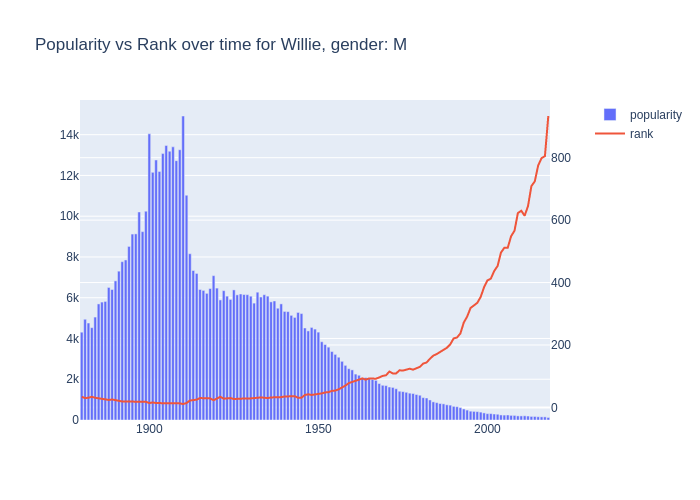

In [55]:
popular_name('Willie','M')